In [69]:
#Import all libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.decomposition import PCA


In [70]:
#Download dataset1
!gdown 1QZgDs-XD2fHWo4fHaC7mS-bcsEhEVpGy

Downloading...
From: https://drive.google.com/uc?id=1QZgDs-XD2fHWo4fHaC7mS-bcsEhEVpGy
To: /content/Advertising Budget and Sales.csv
100% 4.80k/4.80k [00:00<00:00, 16.2MB/s]


import numpy as np # linear algebra
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.decomposition import PCA


In [71]:
#Read the dataset as csv
df1 = pd.read_csv('./Advertising Budget and Sales.csv')

In [72]:
#df1 = pd.read_csv('/content/drive/MyDrive/Vnp project/Advertising Budget and Sales.csv')

In [73]:
#View first rows of the dataset
df1.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [74]:
#Check for null values
df1.isnull().sum()

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [75]:
#Drop unnecessary columns
df1.drop(["Unnamed: 0"], axis=1, inplace=True)


<Axes: xlabel='TV Ad Budget ($)', ylabel='Sales ($)'>

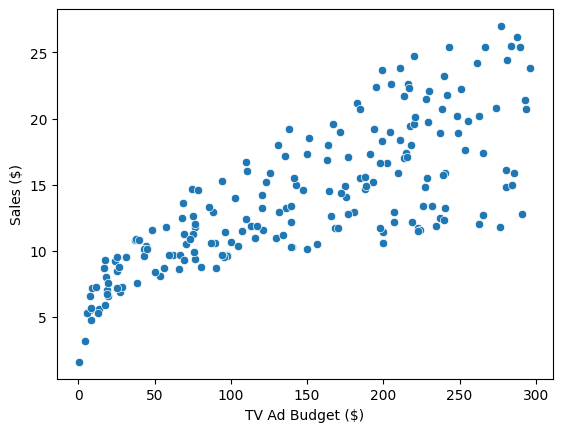

In [76]:
#Show visualization between TV Ad Budget and Sales
sns.scatterplot(df1, x = "TV Ad Budget ($)", y = "Sales ($)")


<Axes: xlabel='Radio Ad Budget ($)', ylabel='Sales ($)'>

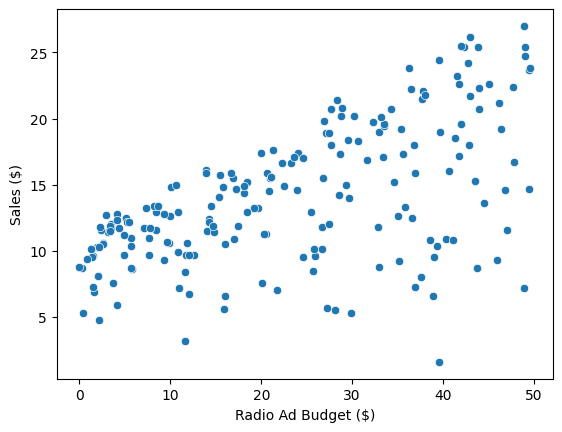

In [116]:
#Show visualization between Radio Ad Budget and Sales
sns.scatterplot(df1, x = "Radio Ad Budget ($)", y = "Sales ($)")


<Axes: xlabel='TV Ad Budget ($)', ylabel='Sales ($)'>

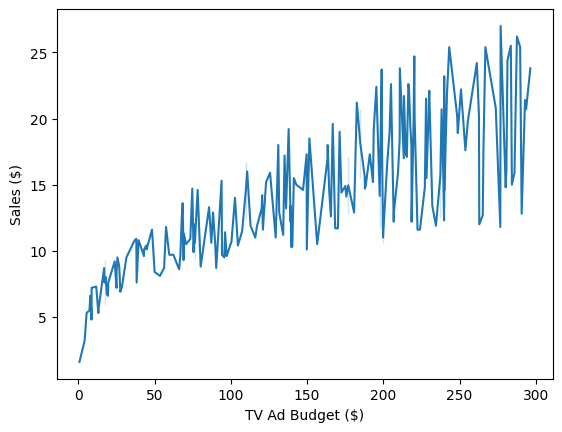

In [78]:
sns.lineplot(df1, x = "TV Ad Budget ($)", y = "Sales ($)")


<Axes: xlabel='Radio Ad Budget ($)', ylabel='Sales ($)'>

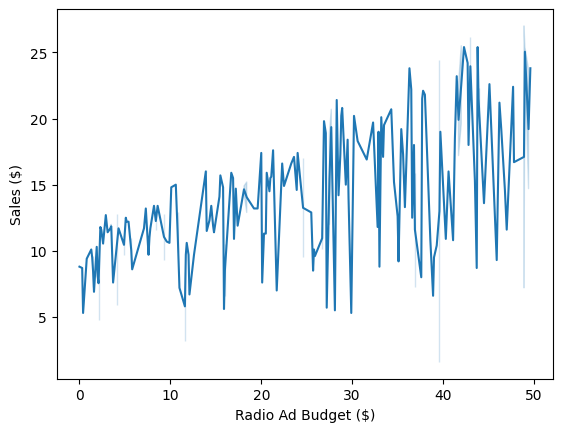

In [79]:
sns.lineplot(df1, x = "Radio Ad Budget ($)", y = "Sales ($)")


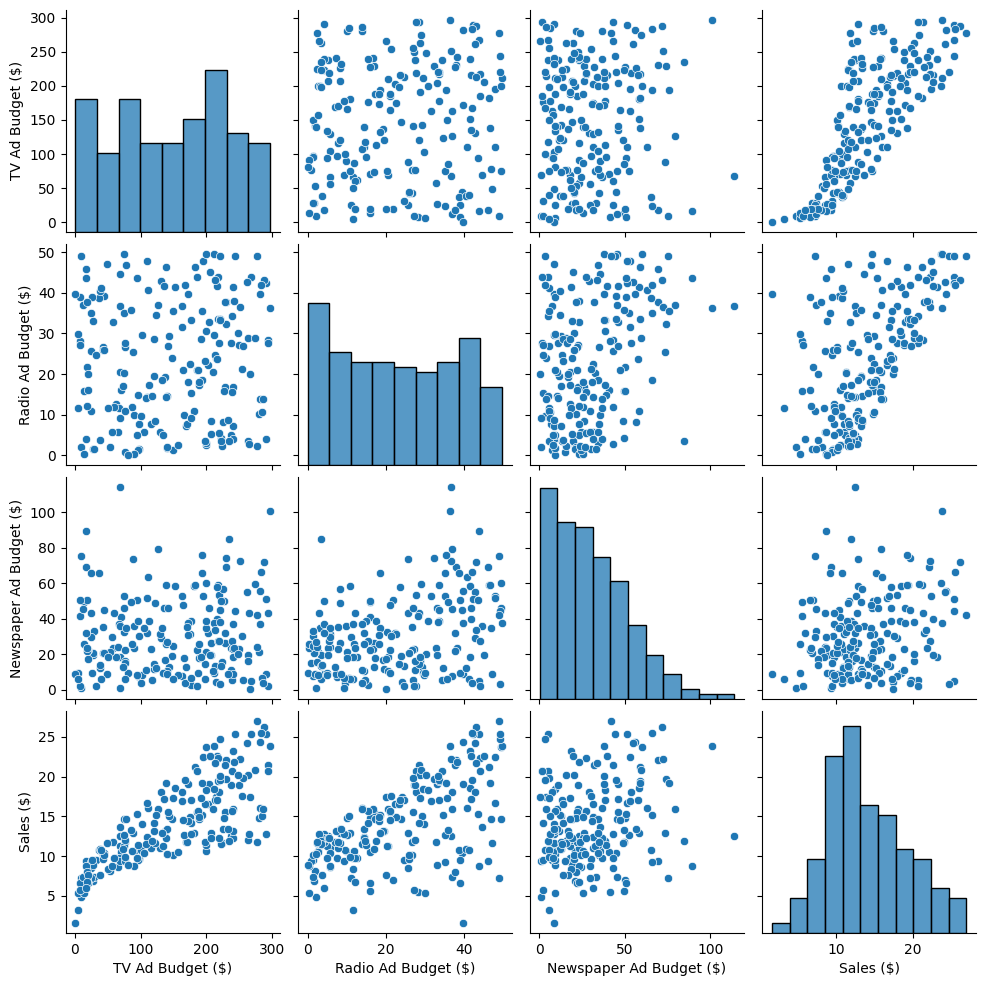

In [81]:
sns.pairplot(df1)

In [82]:
#SHow correlations between columns
df1.corr()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
TV Ad Budget ($),1.000000,0.054809,0.056648,0.782224
Radio Ad Budget ($),0.054809,1.000000,0.354104,0.576223
Newspaper Ad Budget ($),0.056648,0.354104,1.000000,0.228299
Sales ($),0.782224,0.576223,0.228299,1.000000


In [83]:
# Calculate VIF for independent variable
vif = pd.DataFrame()
vif["Variable"] = df1.columns[:-1]
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1]-1)]

In [84]:
print(vif)

                  Variable        VIF
0         TV Ad Budget ($)  23.198876
1      Radio Ad Budget ($)  12.570312
2  Newspaper Ad Budget ($)   3.153498



VIF = 1: No multicollinearity. The variance of the coefficient estimates is not inflated at all.

1 < VIF < 5: Moderate multicollinearity. The variance of the coefficient estimates is moderately inflated, but it may not significantly affect the results.

5 < VIF < 10: High multicollinearity. The variance of the coefficient estimates is highly inflated, and multicollinearity may be a concern, warranting further investigation.

VIF > 10: Severe multicollinearity. The variance of the coefficient estimates is very highly inflated, and multicollinearity is likely to significantly affect the results. This typically indicates a problem that needs to be addressed, such as removing one or more correlated predictors from the model.

Conclusion: From above we can see that TV AdBudget and Radio AdBudget are having high values of multicolearity.

In [85]:
#Seoaret features from target columns and create testing and training datasets
X = df1[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]
Y = df1['Sales ($)']
x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.25)

In [86]:
#Create the model
model1 = LinearRegression()

In [87]:
#Train the model on test data
model1.fit(x_train[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']], y_train)


LinearRegression()

In [88]:
#Predict and calculate r2 score
predictions = model1.predict(x_test[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']])
# r2 Score
r2_score_model1 = r2_score(y_test,predictions)
r2_score_model1

0.8789018092977363

In [89]:
#Calculate mean squared error
test_rmse_model1 = mean_squared_error(y_test, predictions, squared=False)
print(test_rmse_model1)

1.8744267322147985


In [90]:
#Creating model for scaled values
X = df1.drop(columns=["Sales ($)"])
y = df1["Sales ($)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model2 = LinearRegression()
model2.fit(X_train_scaled, y_train)

train_predictions = model2.predict(X_train_scaled)
test_predictions = model2.predict(X_test_scaled)

train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse_model2 = mean_squared_error(y_test, test_predictions, squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse_model2)

Train RMSE: 1.644727765644337
Test RMSE: 1.7815996615334506


In [91]:
#R2 score for scaled model
r2_score_model2 = r2_score(y_test,test_predictions)
print(r2_score_model2)

0.8994380241009119


In [92]:
#Download the second dataset
!gdown 19VKeJ_Uh7wddVlK-HlmXspiiSeMWPeKD

Downloading...
From: https://drive.google.com/uc?id=19VKeJ_Uh7wddVlK-HlmXspiiSeMWPeKD
To: /content/Dummy Data HSS.csv
100% 206k/206k [00:00<00:00, 82.5MB/s]


We get better results for model2 because the data is scaled


In [93]:
#Read the dataset as csv
df2 = pd.read_csv('./Dummy Data HSS.csv')

In [94]:
#df2 = pd.read_csv('/content/drive/MyDrive/Vnp project/Dummy Data HSS.csv')

In [95]:
#Show first rows of the dataset
df2.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [96]:
#Check for null values
df2.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [97]:
#Drop null values
df2 = df2.dropna()

print('Number of missing values:', df2.isnull().sum())

Number of missing values: TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64


In [98]:
#Drop some columns
df2 = df2.drop(columns = ['Influencer','Social Media'], axis = 1)



In [99]:
df1.drop(columns=['Newspaper Ad Budget ($)'],axis =1,inplace=True)

In [100]:
df2.columns = ['TV Ad Budget ($)', 'Radio Ad Budget ($)','Sales ($)']


In [101]:
#Download the third dataset
!gdown 17uxqCKOT4nIDrT9gIEH_tFoVk4x-jYgT

Downloading...
From: https://drive.google.com/uc?id=17uxqCKOT4nIDrT9gIEH_tFoVk4x-jYgT
To: /content/ADS.csv
100% 268k/268k [00:00<00:00, 37.1MB/s]


In [102]:
#Read the dataset as csv
df3 = pd.read_csv('./ADS.csv')

In [103]:
#df3 = pd.read_csv('/content/drive/MyDrive/Vnp project/ADS.csv')
df3.head()

,Instagram,Facebook,YouTube,Twitter,Telegram,WhatsApp,TikTok,Radio,TV,Newspaper,Website,Sales
0,48,44,53,12,74,27,14,8,2,24,15,30
1,47,44,52,13,40,36,58,37,26,6,23,11
2,79,40,73,59,53,34,37,33,34,21,1,20
3,72,42,41,12,55,17,45,25,47,36,21,27
4,87,79,32,32,70,25,54,1,43,35,48,32


In [104]:
#Drop and manipulate some columns
df3.drop(columns=['Instagram','Facebook','YouTube','Twitter','Telegram','WhatsApp','TikTok','Newspaper','Website'],axis=1,inplace=True)

In [105]:
df3 = df3.rename(columns = {'Radio' : 'Radio Ad Budget ($)','TV' : 'TV Ad Budget ($)', 'Sales': 'Sales ($)'})

In [106]:
df3 = pd.DataFrame(df3)
desired_columns = ['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Sales ($)']

# Reorder columns using reindex
df3 = df3.reindex(columns=desired_columns)
print(df2)
print(df1)
print(df3)

      TV Ad Budget ($)  Radio Ad Budget ($)   Sales ($)
0                 16.0             6.566231   54.732757
1                 13.0             9.237765   46.677897
2                 41.0            15.886446  150.177829
3                 83.0            30.020028  298.246340
4                 15.0             8.437408   56.594181
...                ...                  ...         ...
4567              26.0             4.472360   94.685866
4568              71.0            20.610685  249.101915
4569              44.0            19.800072  163.631457
4570              71.0            17.534640  253.610411
4571              42.0            15.966688  148.202414

[4546 rows x 3 columns]
     TV Ad Budget ($)  Radio Ad Budget ($)  Sales ($)
0               230.1                 37.8       22.1
1                44.5                 39.3       10.4
2                17.2                 45.9        9.3
3               151.5                 41.3       18.5
4               180.8            

In [107]:
#Concat all datasets
data = pd.concat([df2, df1,df3], axis=0,keys=['Radio Ad Budget ($)','TV Ad Budget ($)','Sales ($)'])

# Reset index (optional)
data.reset_index(drop=True, inplace=True)

# Display concatenated DataFrame
print(data)

       TV Ad Budget ($)  Radio Ad Budget ($)   Sales ($)
0                  16.0             6.566231   54.732757
1                  13.0             9.237765   46.677897
2                  41.0            15.886446  150.177829
3                  83.0            30.020028  298.246340
4                  15.0             8.437408   56.594181
...                 ...                  ...         ...
12439              42.0            49.000000   10.000000
12440              20.0             7.000000   17.000000
12441              39.0            13.000000   14.000000
12442               6.0            32.000000   39.000000
12443              47.0             5.000000   38.000000

[12444 rows x 3 columns]


In [108]:
data.head()

,TV Ad Budget ($),Radio Ad Budget ($),Sales ($)
0,16.0,6.566231,54.732757
1,13.0,9.237765,46.677897
2,41.0,15.886446,150.177829
3,83.0,30.020028,298.246340
4,15.0,8.437408,56.594181


In [109]:
data.isnull().sum()

TV Ad Budget ($)       0
Radio Ad Budget ($)    0
Sales ($)              0
dtype: int64

In [110]:
#Separate features from target
X = data[['TV Ad Budget ($)', 'Radio Ad Budget ($)']]
Y = data['Sales ($)']

In [111]:
#Create the model using linear regression, train, precit and calculate r2 score
model1= LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
r2_score_model1 = r2_score(y_test, y_pred)
print("R-squared Score (without scaling):", r2_score_model2)

R-squared Score (without scaling): 0.8994380241009119


In [112]:
#Calculate mean absolute error and mean sqaured error
mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred)

(52.41968775188863, 5243.390876102414)

<Axes: xlabel='TV Ad Budget ($)', ylabel='Sales ($)'>

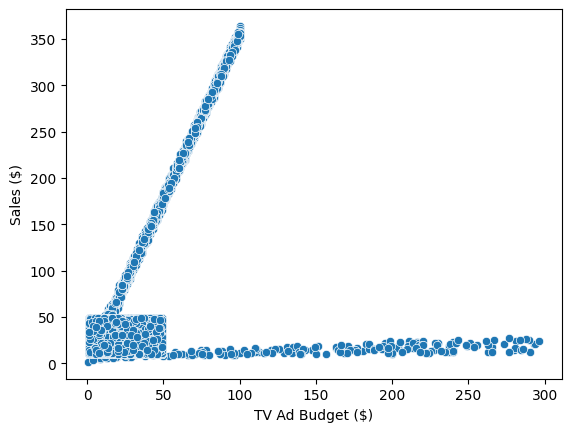

In [113]:
#Create a scatterplot for TV AD Budget and Sales
sns.scatterplot(data, x = "TV Ad Budget ($)", y = "Sales ($)")

<Axes: xlabel='Radio Ad Budget ($)', ylabel='Sales ($)'>

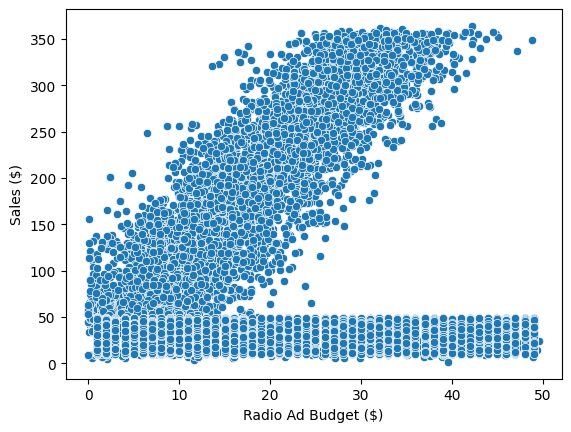

In [114]:
#Create a scatterplot for Radio AD Budget and Sales
sns.scatterplot(data, x = "Radio Ad Budget ($)", y = "Sales ($)")

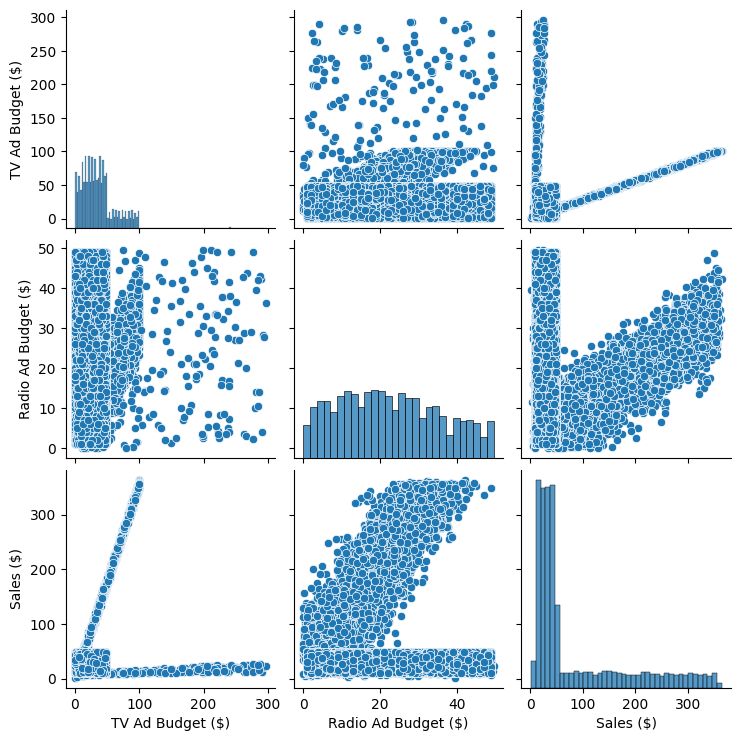

In [115]:
#Create pairplot
sns.pairplot(data)